
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [78]:
student_number = '99101643'
first_name = 'Sara'
last_name = 'Rezanezhad'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [80]:
data = pd.read_csv('spotify.csv')
data.head(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,4,-2.419,0,0.0434,0.0335,0.000005,0.1110,0.367,127.936,207619
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-3.562,1,0.0565,0.0249,0.000004,0.6370,0.366,127.015,193187
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2,-4.552,1,0.0320,0.0567,0.000000,0.0919,0.590,124.957,253040


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [81]:
def standard_scaler(X):
    """
    Standardize the numerical features by removing the mean and scaling to unit variance.

    Parameters:
    X (pd.DataFrame): The input data to be standardized.

    Returns:
    pd.DataFrame: The standardized data.
    """
    # Select only the numerical columns
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns
    X_num = X[num_cols]

    # Calculate the mean and standard deviation of each numerical feature
    means = X_num.mean()
    stds = X_num.std()

    # Standardize the numerical data
    X_num_std = (X_num - means) / stds

    # Create a new DataFrame with the standardized numerical columns and the original non-numerical columns
    X_std = X.copy()
    X_std[num_cols] = X_num_std

    return X_std

# Apply the standard scalar to the data
data_std = standard_scaler(data)


shape of data: (32833, 23)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 n

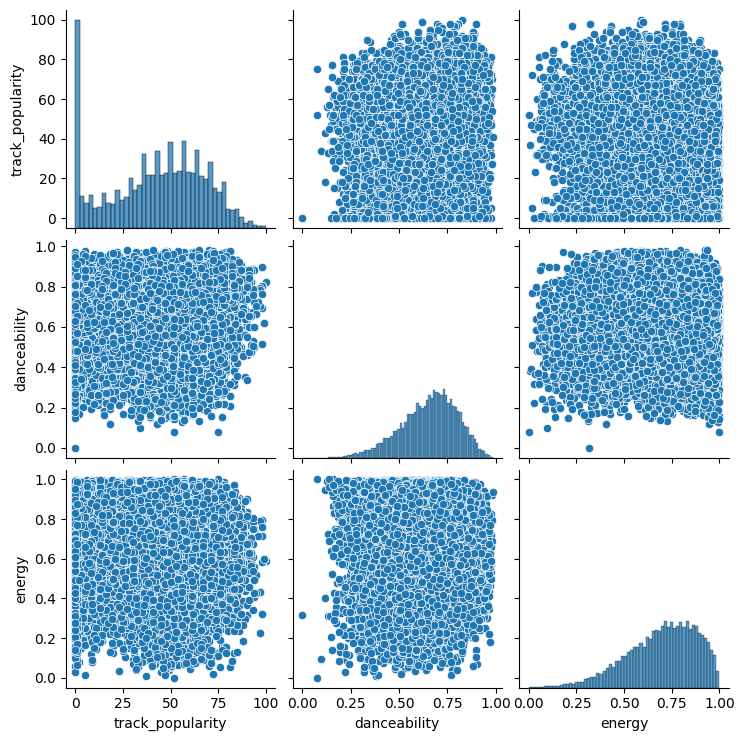

In [82]:
print(f'shape of data: {data.shape}\n')

print(f'information of data:\n{data.info()}\n')

print(f'summary statistics of the data:\n{data.describe()}\n')

# Removing unnecesary columns

data=data.drop(['track_id','track_name','track_album_id'
,'track_album_name','track_album_release_date','playlist_name','playlist_id','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence'
,'tempo','duration_ms'],axis=1)

# Replacing any NaN values in the dataframe with 0
data = data.fillna(value=0)

print(f'number of NaN values in each column:\n{data.isna().sum()}')

# Creating a pairplot using Seaborn library
sns.pairplot(data)


# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

In [83]:
# Select only the numeric columns
data_std = data_std.select_dtypes(include=['int64', 'float64'])

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(data_std)

# Determine the number of principal components to retain
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Choose the number of principal components based on a suitable cut-off for the explained variance ratio
n_components = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95)
print(f"Retaining {n_components} principal components, which explain {cumulative_variance[n_components]*100:.2f}% of the variance.")

# Transform the data to the reduced dimensional space
data_pca = data_std.iloc[:, :n_components]


Retaining 11 principal components, which explain 98.31% of the variance.


# Clustering

Implement K-means for clustering from scratch.

In [84]:
def kmeans(X, n_clusters, max_iterations=100):
    """
    Implement the K-Means clustering algorithm from scratch.

    Parameters:
    X (np.ndarray): The input data to be clustered.
    n_clusters (int): The number of clusters to form.
    max_iterations (int): The maximum number of iterations to perform.

    Returns:
    np.ndarray: The cluster assignments for each data point.
    np.ndarray: The final cluster centroids.
    """
    # Initialize cluster centroids randomly
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    for _ in range(max_iterations):
        # Assign data points to clusters
        distances = np.linalg.norm(X[:, None] - centroids, axis=-1)
        cluster_assignments = np.argmin(distances, axis=1)

        # Update cluster centroids
        new_centroids = np.array([X[cluster_assignments == i].mean(axis=0) for i in range(n_clusters)])

        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return cluster_assignments, centroids

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

Top features for Principal Component 1: track_popularity, track_artist, playlist_genre
Top features for Principal Component 2: playlist_genre, track_artist, track_popularity


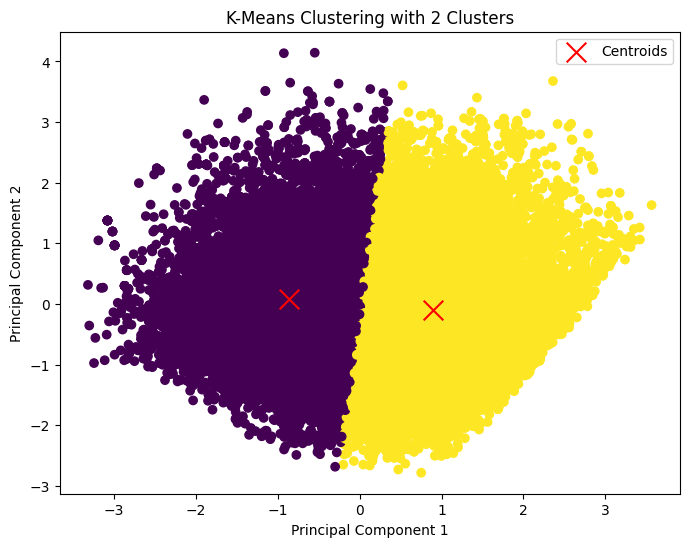

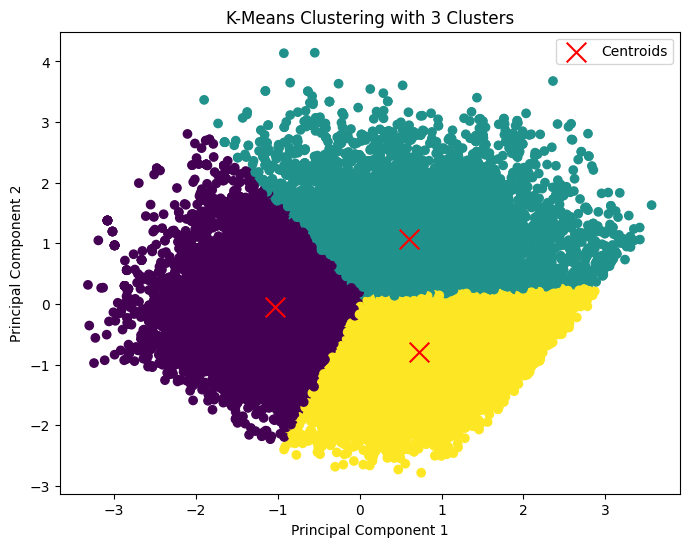

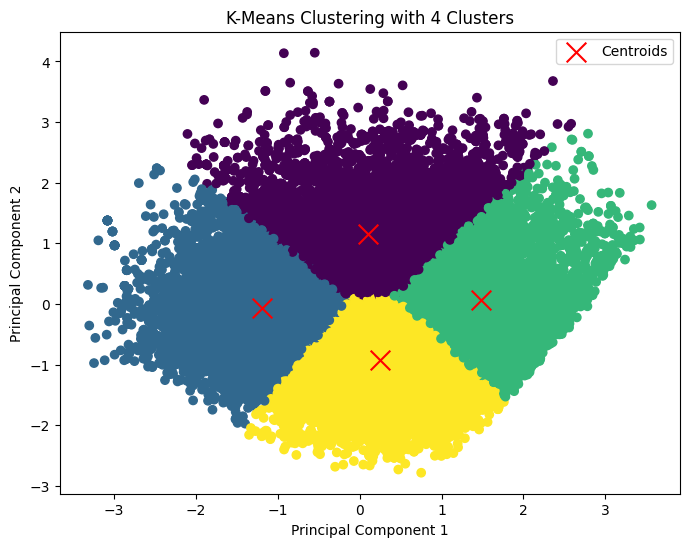

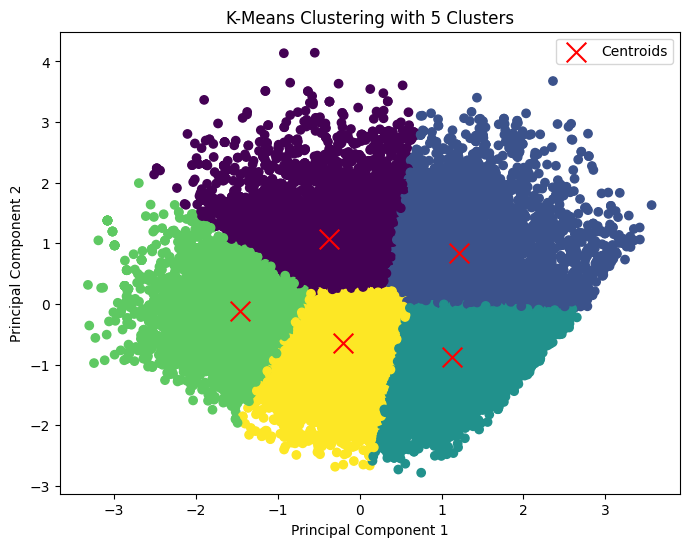

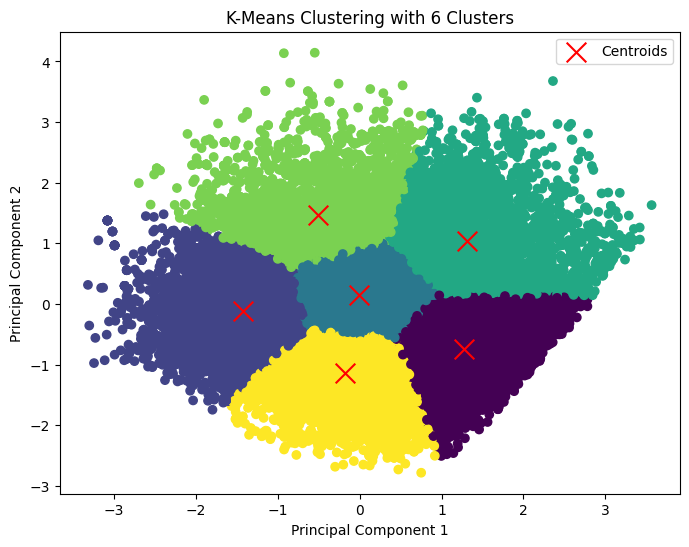

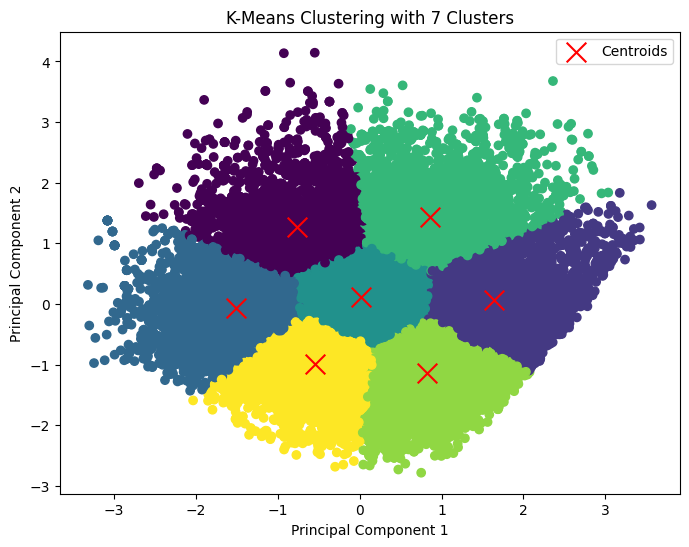

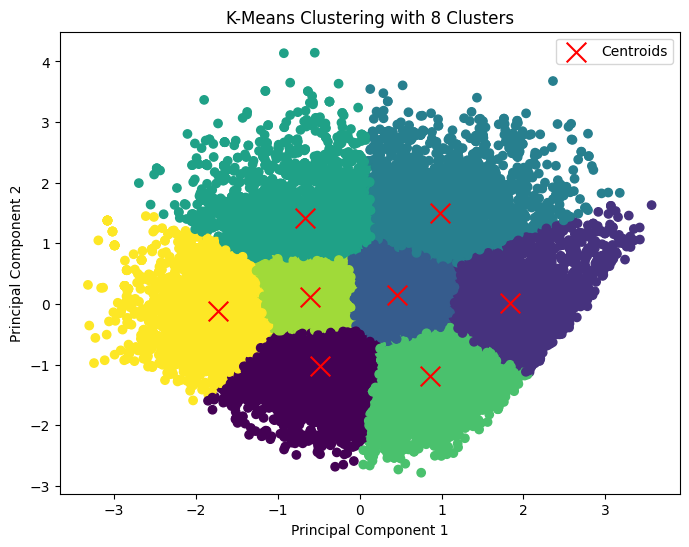

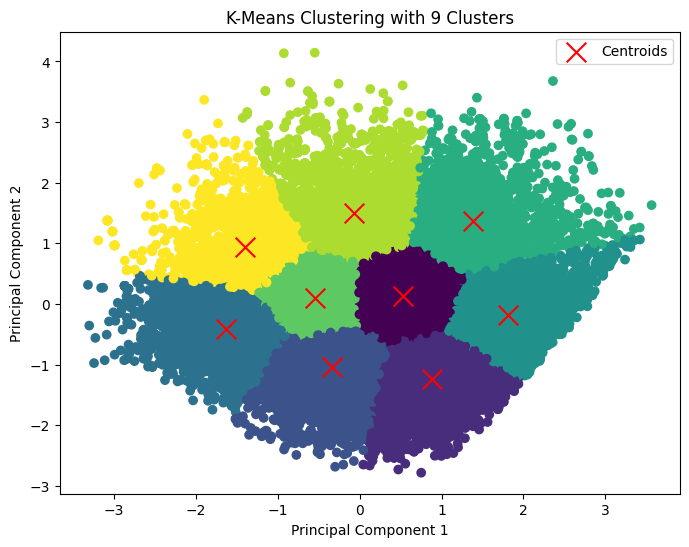

Top features for Principal Component 1: track_artist, playlist_genre
Top features for Principal Component 2: track_artist, track_popularity


In [85]:
# Convert categorical columns to numerical format
data['track_artist'] = data['track_artist'].astype(str)
data['playlist_genre'] = data['playlist_genre'].astype(str)
data['playlist_subgenre'] = data['playlist_subgenre'].astype(str)

# Standardize the numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(['track_artist', 'playlist_genre', 'playlist_subgenre'], axis=1))

# Perform PCA and select the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_columns = [f'Principal Component {i+1}' for i in range(X_pca.shape[1])]

# Get the principal component vectors
pc1 = pca.components_[0]
pc2 = pca.components_[1]

# Find the top features for each principal component
top_pc1_features = data.columns[np.argsort(np.abs(pc1))[-3:]]
top_pc2_features = data.columns[np.argsort(np.abs(pc2))[-3:]]

print(f"Top features for Principal Component 1: {', '.join(top_pc1_features)}")
print(f"Top features for Principal Component 2: {', '.join(top_pc2_features)}")

# Run K-Means with different numbers of clusters
for n_clusters in range(2, 10):
    cluster_assignments, centroids = kmeans(X_pca, n_clusters)

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_assignments, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters')
    plt.xlabel(pca_columns[0])
    plt.ylabel(pca_columns[1])
    plt.legend()
    plt.show()
# Find the top features for each principal component
top_pc1_features = data.columns[np.argsort(np.abs(pc1))[-2:]]
top_pc2_features = data.columns[np.argsort(np.abs(pc2))[-2:]]

print(f"Top features for Principal Component 1: {', '.join(top_pc1_features)}")
print(f"Top features for Principal Component 2: {', '.join(top_pc2_features)}")


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

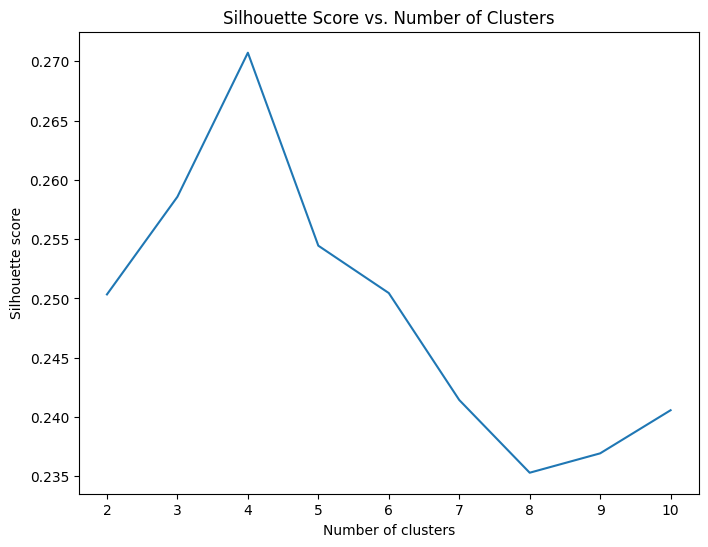

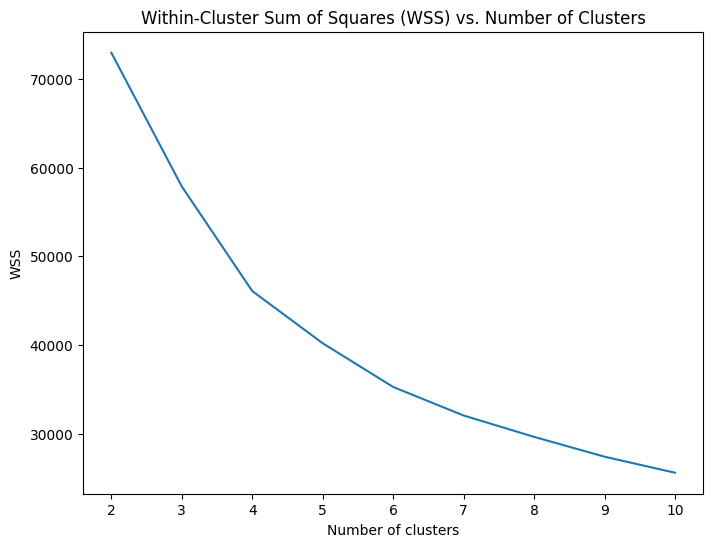

In [86]:
# Calculate Silhouette score and WSS for different numbers of clusters
silhouette_scores = []
wss_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calculate Silhouette score
    silhouette_score_value = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_score_value)

    # Calculate Within-Cluster Sum of Squares (WSS)
    wss = kmeans.inertia_
    wss_scores.append(wss)

# Plot Silhouette score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Plot WSS
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wss_scores)
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('Within-Cluster Sum of Squares (WSS) vs. Number of Clusters')
plt.show()


# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [87]:
# Assuming you have the cluster assignments in a variable called 'cluster_assignments'
cluster_centers = []
for i in range(n_clusters):
    cluster_members = np.where(cluster_assignments == i)[0]
    if len(cluster_members) >= 2:
        sample_songs = random.sample(list(cluster_members), 2)
        print(f"Cluster {i}:")
        print(f"Song 1: {data.iloc[sample_songs[0]]}")
        print(f"Song 2: {data.iloc[sample_songs[1]]}")
        print(f"Distance between songs: {np.linalg.norm(X_scaled[sample_songs[0]] - X_scaled[sample_songs[1]])}")
        print()


Cluster 0:
Song 1: track_artist                            Tiësto
track_popularity                            49
playlist_genre                             edm
playlist_subgenre    progressive electro house
danceability                              0.58
energy                                   0.781
Name: 31794, dtype: object
Song 2: track_artist         Raphael Saadiq
track_popularity                 38
playlist_genre                  r&b
playlist_subgenre          neo soul
danceability                  0.654
energy                        0.775
Name: 26041, dtype: object
Distance between songs: 0.6746156810278278

Cluster 1:
Song 1: track_artist           KXNG Crooked
track_popularity                  2
playlist_genre                  r&b
playlist_subgenre    new jack swing
danceability                  0.859
energy                         0.76
Name: 25053, dtype: object
Song 2: track_artist         Genairo Nvilla
track_popularity                  5
playlist_genre                latin

Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

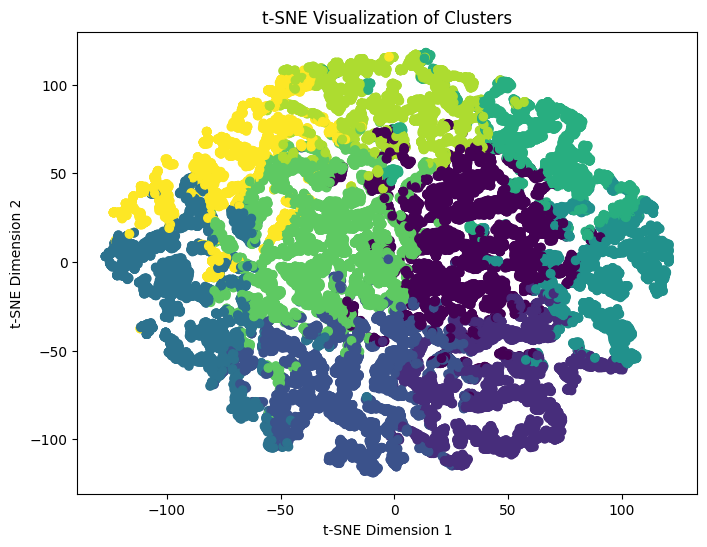

In [88]:
# Compute the t-SNE embedding
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the t-SNE embedding with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_assignments, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
